# Project One: Climate Change - Earth Surface Temperature

In [1]:
# Import relevant dependencies

import pandas as pd
import gmaps
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
import requests
import json
import scipy.stats as st
from pprint import pprint
import numpy as np
from config import g_api

## Data Cleanup



#### Import & clean up our primary data - global temperature

In [2]:
# Read CSV & format the date variable & remove na
global_temp = pd.read_csv('GlobalLandTemperaturesByCountry 4.csv',parse_dates=["dt"], index_col="dt")
global_temp.dropna(inplace=True)

# Preview the DataFrame
global_temp.head()


,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1743-11-01,4.384,2.294,Åland
1744-04-01,1.530,4.680,Åland
1744-05-01,6.702,1.789,Åland
1744-06-01,11.609,1.577,Åland
1744-07-01,15.342,1.410,Åland


In [3]:
# Retrieve the Year from the "dt" variable for later groupby process
global_temp["Year"] = global_temp.index.year

# Preview DataFrame
global_temp.head()

,AverageTemperature,AverageTemperatureUncertainty,Country,Year
dt,,,,
1743-11-01,4.384,2.294,Åland,1743
1744-04-01,1.530,4.680,Åland,1744
1744-05-01,6.702,1.789,Åland,1744
1744-06-01,11.609,1.577,Åland,1744
1744-07-01,15.342,1.410,Åland,1744


In [4]:
# Only taking the data between 1912 & 2012 & drop Antarctic & Africa

filtered_df = global_temp.loc[(global_temp["Year"]>=1912) & 
                              (global_temp["Year"]<2013) &
                              (global_temp["Country"] != "French Southern And Antarctic Lands") & 
                              (global_temp["Country"] != "Africa")]

filtered_df.head()

,AverageTemperature,AverageTemperatureUncertainty,Country,Year
dt,,,,
1912-01-01,-5.222,0.849,Åland,1912
1912-02-01,-5.145,0.478,Åland,1912
1912-03-01,0.678,0.830,Åland,1912
1912-04-01,1.216,0.336,Åland,1912
1912-05-01,5.420,0.229,Åland,1912


In [5]:
# Groupby Year to create the global average yearly temperature DataFrame (1st question)

global_yearly = filtered_df.groupby("Year").agg({"AverageTemperature":"mean"}).reset_index()

global_yearly.head()

,Year,AverageTemperature
0,1912,18.442027
1,1913,18.468523
2,1914,18.637188
3,1915,18.688382
4,1916,18.529711


In [6]:
# Groupby Year & Country and calculate the average yearly temperature for each country in each year
# This DataFrame will be used as the main DataFrame for resolving later questions

country_yearly = filtered_df.groupby(["Country","Year"]).agg({"AverageTemperature":"mean"}).reset_index()

country_yearly.head()

,Country,Year,AverageTemperature
0,Afghanistan,1912,13.902667
1,Afghanistan,1913,13.859250
2,Afghanistan,1914,14.296833
3,Afghanistan,1915,14.914583
4,Afghanistan,1916,13.343000


In [7]:
listofcountries = filtered_df.groupby(["Country"]).agg({"AverageTemperature":"mean"}).reset_index()
listofcountries = listofcountries.drop(columns=["AverageTemperature"])

listofcountries.head()


,Country
0,Afghanistan
1,Albania
2,Algeria
3,American Samoa
4,Andorra


#### Importing our second data source csv file - global population

In [8]:
# Read CSV & format the date variable & remove na
global_pop = pd.read_csv('population_total_long.csv')
global_pop.dropna(inplace=True)

# Preview the DataFrame
global_pop.head()

globalpopulation = global_pop.groupby("Year").agg({"Count":"sum"}).reset_index()

globalpopulation.head()

,Year,Count
0,1960,3019770047
1,1961,3060517665
2,1962,3113194711
3,1963,3177998236
4,1964,3243186569


#### Merging past global temperature file with the global population file

In [9]:
combinedglobal = pd.merge(global_yearly, globalpopulation, on = "Year", how="left")
combinedglobal.rename(columns={"Count":"World Population"}, inplace=True)
combinedglobal.dropna(inplace=True)

combinedglobal.head()

,Year,AverageTemperature,World Population
48,1960,18.921825,3.019770e+09
49,1961,18.961485,3.060518e+09
50,1962,18.729411,3.113195e+09
51,1963,18.711444,3.177998e+09
52,1964,18.618521,3.243187e+09


## Analysis

### 1. What’s the global average yearly temperature movements over the last 10 or 11 decades?
       a. Assumption: The global average yearly temperature has increased


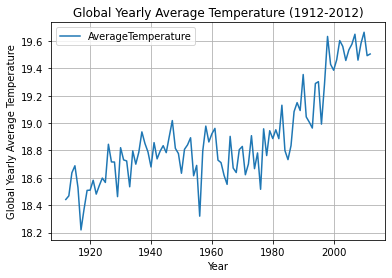

In [10]:
# Global average yearly temperature movements over the last 10 decades
global_yearly = filtered_df.groupby("Year").agg({"AverageTemperature":"mean"}).plot()

plt.title("Global Yearly Average Temperature (1912-2012)")
plt.ylabel("Global Yearly Average Temperature")

plt.grid()

global_yearly

plt.savefig("Global Yearly Average Temperature (1912-2012).png")

### 2. Is there a correlation between global population growth and temperature rise?


The correlation coefficient between Global Population and Average Temperature is 0.89


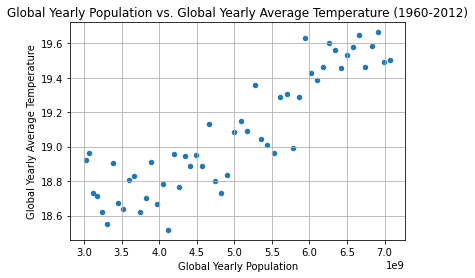

In [32]:
combinedglobal.dtypes
x_values = combinedglobal["World Population"]
y_values = combinedglobal.AverageTemperature
combinedglobal.plot.scatter(x="World Population", y="AverageTemperature")
plt.title("Global Yearly Population vs. Global Yearly Average Temperature (1960-2012)")
plt.xlabel("Global Yearly Population")
plt.ylabel("Global Yearly Average Temperature")

plt.grid()

plt.savefig("Global Yearly Population vs. Global Yearly Average Temperature (1960-2012).png")

print(f"The correlation coefficient between Global Population and Average Temperature is {round(st.pearsonr(x_values,y_values)[0],2)}")

The r-squared is: 0.7944268605457058


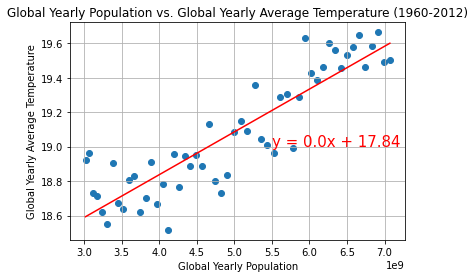

In [33]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.5e+09,19),fontsize=15,color="red")
plt.title("Global Yearly Population vs. Global Yearly Average Temperature (1960-2012)")
plt.xlabel("Global Yearly Population")
plt.ylabel("Global Yearly Average Temperature")

plt.grid()

plt.savefig("Global Yearly Population vs. Global Yearly Average Temperature (1960-2012) V2.png")

print(f"The r-squared is: {rvalue**2}")

### 3. If the temperature movements across the last 10 or 11 decades were different between the Northern and Southern hemisphere.



In [13]:
# Add new columns lat & lng into the listofcountries DataFrame
listofcountries["Lat"] = ""
listofcountries["Lng"] = ""

listofcountries.head()

,Country,Lat,Lng
0,Afghanistan,,
1,Albania,,
2,Algeria,,
3,American Samoa,,
4,Andorra,,


In [14]:

for index, row in listofcountries.iterrows():
    country = row["Country"]
    target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
    'address={0}&key={1}').format(country, g_api)
    geo_data = requests.get(target_url).json()
    
    try:
        listofcountries.loc[index, "Lat"] = geo_data["results"][0]["geometry"]["location"]["lat"]
        listofcountries.loc[index, "Lng"] = geo_data["results"][0]["geometry"]["location"]["lng"]
        
        print(f'Processing record for Country: {geo_data["results"][0]["address_components"][0]["long_name"]}')
        
    except:
        print("Missing field/result... skipping.")


Processing record for Country: Afghanistan
Processing record for Country: Albania
Processing record for Country: Algeria
Processing record for Country: American Samoa
Processing record for Country: Andorra
Processing record for Country: Angola
Processing record for Country: Anguilla
Processing record for Country: Antigua and Barbuda
Processing record for Country: Argentina
Processing record for Country: Armenia
Processing record for Country: Aruba
Processing record for Country: Asia
Processing record for Country: Australia
Processing record for Country: Austria
Processing record for Country: Azerbaijan
Processing record for Country: The Bahamas
Processing record for Country: Bahrain
Processing record for Country: Baker Island
Processing record for Country: Bangladesh
Processing record for Country: Barbados
Processing record for Country: Belarus
Processing record for Country: Belgium
Processing record for Country: Belize
Processing record for Country: Benin
Processing record for Country

Processing record for Country: Somalia
Processing record for Country: South Africa
Processing record for Country: South America
Processing record for Country: South Georgia and the South Sandwich Islands
Processing record for Country: South Korea
Processing record for Country: Spain
Processing record for Country: Sri Lanka
Processing record for Country: Sudan
Processing record for Country: Suriname
Processing record for Country: Svalbard and Jan Mayen
Processing record for Country: Eswatini
Processing record for Country: Sweden
Processing record for Country: Switzerland
Processing record for Country: Syria
Processing record for Country: Taiwan
Processing record for Country: Tajikistan
Processing record for Country: Tanzania
Processing record for Country: Thailand
Processing record for Country: Timor-Leste
Processing record for Country: Togo
Processing record for Country: Tonga
Processing record for Country: Trinidad and Tobago
Processing record for Country: Tunisia
Processing record fo

In [15]:
listofcountries.head()

,Country,Lat,Lng
0,Afghanistan,33.9391,67.71
1,Albania,41.1533,20.1683
2,Algeria,28.0339,1.65963
3,American Samoa,-14.271,-170.132
4,Andorra,42.5063,1.5218


In [16]:
hemisphere_df = pd.merge(country_yearly, listofcountries, on = "Country", how="left")
hemisphere_df.head()


,Country,Year,AverageTemperature,Lat,Lng
0,Afghanistan,1912,13.902667,33.9391,67.71
1,Afghanistan,1913,13.859250,33.9391,67.71
2,Afghanistan,1914,14.296833,33.9391,67.71
3,Afghanistan,1915,14.914583,33.9391,67.71
4,Afghanistan,1916,13.343000,33.9391,67.71


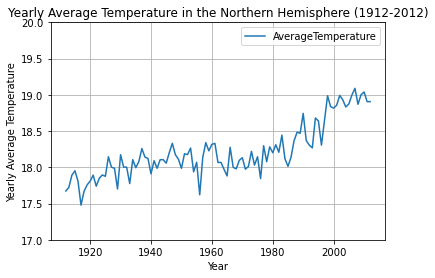

In [17]:
northern_df = hemisphere_df[(hemisphere_df.Lat >= 0)]

northern_df = northern_df.groupby("Year").agg({"AverageTemperature":"mean"}).plot()

plt.title('Yearly Average Temperature in the Northern Hemisphere (1912-2012)')
plt.xlabel('Year')
plt.ylabel('Yearly Average Temperature')

plt.ylim(17, 20)

plt.grid()

plt.savefig("Yearly Average Temperature in the Northern Hemisphere (1912-2012).png")

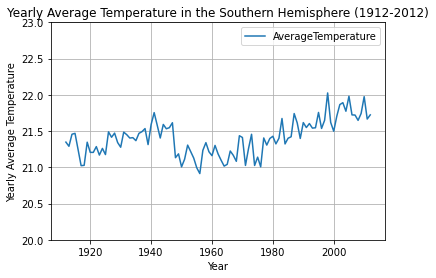

In [18]:
southern_df = hemisphere_df[(hemisphere_df.Lat < 0)]

southern_df = southern_df.groupby("Year").agg({"AverageTemperature":"mean"}).plot()

plt.title('Yearly Average Temperature in the Southern Hemisphere (1912-2012)')
plt.xlabel('Year')
plt.ylabel('Yearly Average Temperature')

plt.ylim(20, 23)

plt.grid()

plt.savefig("Yearly Average Temperature in the Southern Hemisphere (1912-2012).png")

### 4. Which are the top 10 countries in the Northern hemisphere that have the largest range between their maximum & minimum average yearly temperature in the past 10 decades

In [19]:
northern_V2 = hemisphere_df[(hemisphere_df.Lat >= 0)]

In [20]:
max_tem = northern_V2.groupby('Country')['AverageTemperature'].max()
min_tem = northern_V2.groupby('Country')['AverageTemperature'].min()

diff = max_tem - min_tem

country_tem_changes = pd.DataFrame({
    "Maximum": max_tem,
    "Minimum": min_tem,
    "Differences": diff
})

country_tem_changes.head()

,Maximum,Minimum,Differences
Country,,,
Afghanistan,15.828667,12.547167,3.281500
Albania,14.099667,11.582500,2.517167
Algeria,25.215667,22.356750,2.858917
Andorra,12.994417,10.297333,2.697083
Anguilla,27.856000,25.926667,1.929333


In [21]:
# Find the bottom countries (countries that had the smalles change in temperature)

large_changes = country_tem_changes.nlargest(10, 'Differences').reset_index()
large_changes

,Country,Maximum,Minimum,Differences
0,Svalbard And Jan Mayen,-3.781000,-9.682667,5.901667
1,Canada,-1.887917,-6.802917,4.915000
2,Greenland,-15.546333,-20.446833,4.900500
3,Denmark,-15.085750,-19.857750,4.772000
4,Estonia,7.267833,2.549583,4.718250
5,Finland,3.834750,-0.855833,4.690583
6,Latvia,7.681083,3.145000,4.536083
7,Armenia,11.509500,7.020583,4.488917
8,Georgia,11.102417,6.639583,4.462833
9,Azerbaijan,13.962667,9.594083,4.368583


In [22]:
# Merge the country information with lat & lng locations

large_changes = pd.merge(large_changes, listofcountries, on="Country", how="left")
large_changes

,Country,Maximum,Minimum,Differences,Lat,Lng
0,Svalbard And Jan Mayen,-3.781000,-9.682667,5.901667,77.5536,23.6703
1,Canada,-1.887917,-6.802917,4.915000,56.1304,-106.347
2,Greenland,-15.546333,-20.446833,4.900500,71.7069,-42.6043
3,Denmark,-15.085750,-19.857750,4.772000,56.2639,9.50178
4,Estonia,7.267833,2.549583,4.718250,58.5953,25.0136
5,Finland,3.834750,-0.855833,4.690583,61.9241,25.7482
6,Latvia,7.681083,3.145000,4.536083,56.8796,24.6032
7,Armenia,11.509500,7.020583,4.488917,40.0691,45.0382
8,Georgia,11.102417,6.639583,4.462833,32.1656,-82.9001
9,Azerbaijan,13.962667,9.594083,4.368583,40.1431,47.5769


In [23]:
gmaps.configure(api_key = g_api)

In [24]:
# Plot Gmaps to show the location of the countries that had the smallest average yearly temperature changes

center = (65,19)

locations = large_changes[["Lat", "Lng"]]

changes = large_changes["Differences"].astype(float)

fig = gmaps.figure(center=center, zoom_level=2)

markers = gmaps.marker_layer(locations)

fig.add_layer(markers)


fig


Figure(layout=FigureLayout(height='420px'))

### 5. Looking at the United States

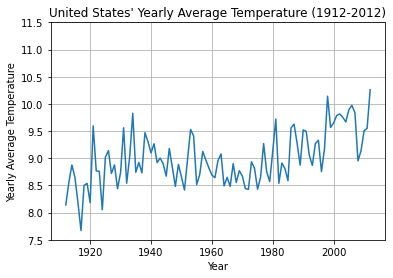

In [25]:
usa = country_yearly[(country_yearly.Country == "United States")]

x_axis = usa["Year"]
y_axis = usa["AverageTemperature"]

plt.plot(x_axis, y_axis)

plt.title("United States' Yearly Average Temperature (1912-2012)")
plt.xlabel('Year')
plt.ylabel('Yearly Average Temperature')

plt.ylim(7.5, 11.5)

plt.grid()

plt.savefig("United States' Yearly Average Temperature (1912-2012).png")

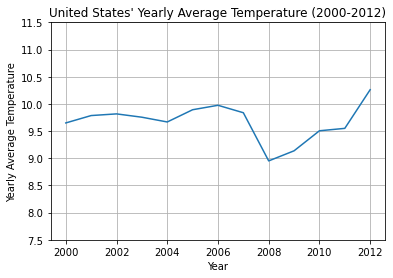

In [26]:
usa_V2 = usa[(usa.Year >= 2000)]

x_axis = usa_V2["Year"]
y_axis = usa_V2["AverageTemperature"]

plt.plot(x_axis, y_axis)

plt.title("United States' Yearly Average Temperature (2000-2012)")
plt.xlabel('Year')
plt.ylabel('Yearly Average Temperature')

plt.ylim(7.5, 11.5)

plt.grid()

plt.savefig("United States' Yearly Average Temperature (2000-2012).png")

### 6. Looking at Australia

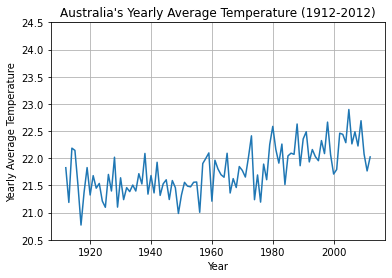

In [27]:
australia = country_yearly[(country_yearly.Country == "Australia")]

x_axis = australia["Year"]
y_axis = australia["AverageTemperature"]

plt.plot(x_axis, y_axis)

plt.title("Australia's Yearly Average Temperature (1912-2012)")
plt.xlabel('Year')
plt.ylabel('Yearly Average Temperature')

plt.ylim(20.5, 24.5)

plt.grid()

plt.savefig("Australia's Yearly Average Temperature (1912-2012).png")

The r-squared is: 0.3993546238021572


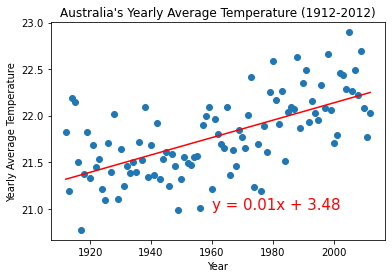

<Figure size 432x288 with 0 Axes>

In [28]:
x_values = australia["Year"]
y_values = australia["AverageTemperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1960,21),fontsize=15,color="red")
plt.title("Australia's Yearly Average Temperature (1912-2012)")
plt.xlabel("Year")
plt.ylabel("Yearly Average Temperature")
print(f"The r-squared is: {rvalue**2}")

plt.show()

plt.savefig("Australia's Yearly Average Temperature (1912-2012).png")

### 7. Predicting Australia's average yearly temperature in 2015



In [29]:
x = 2030
y = slope * x + intercept

y

22.417304917491748